<a href="https://colab.research.google.com/github/littlemogwai/Argentina-peso/blob/main/argentine_peso_june_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-13-3611066344>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([parallel_df, black_df, official_df], ignore_index=True)


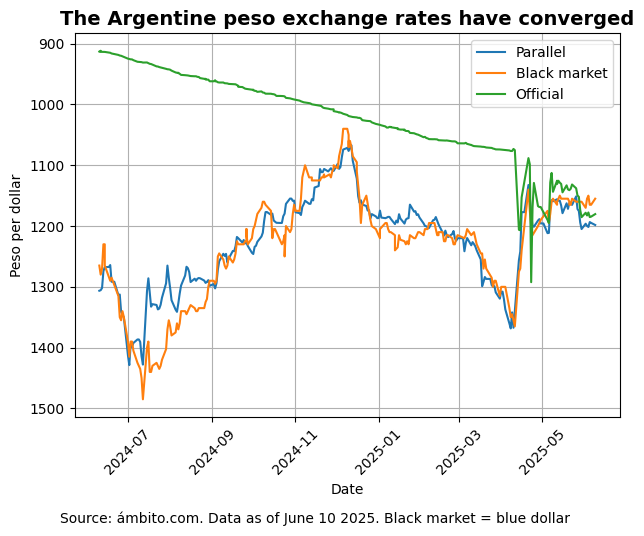

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

url = "https://raw.githubusercontent.com/littlemogwai/Argentina-peso/refs/heads/main/Argentina_peso_100625.csv"

def read_file(url):
  df_raw = pd.read_csv(url)
  # make copy to leave original intact, or in case another version needed
  df = df_raw
  return df

# remove unnecessary columns
def remove_rename_columns(df):
  df = df.drop(columns=['Unnamed: 3', 'Cash dollar', 'Blue dollar', 'Official'])
  # Renames some redundant columns to reuse
  df = df.rename(columns={
    'Reference': 'Parallel',
    'Unnamed: 8': 'Black market',
    'Unnamed: 13': 'Official'
  })
  return df

# Replaces commas from 5 columns with periods
def replace_commas(df):
  clean_columns = ['Parallel', 'Buys', 'Sale', 'Buys.1', 'Sale.1']
  for column in clean_columns:
      df[column] = df[column].str.replace(',', '.', regex=False)
  # convert numbers to numbers
  for column in clean_columns:
      df[column] = pd.to_numeric(df[column], errors='coerce')
  return df

# Averages buy and sell columns
def average_column(df):
  df['Black market'] = df[['Buys', 'Sale']].mean(axis=1)
  df['Official'] = df[['Buys.1', 'Sale.1']].mean(axis=1)
  return df

# Removes redundant columns after calculations
def remove_columns(df):
  df = df.drop(columns=['Buys', 'Sale', 'Buys.1', 'Sale.1'])
  return df

def convert_to_dates(df):
  # ensures all dates are actually recognised as dates
  df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
  df['Date.1'] = pd.to_datetime(df['Date.1'], format='mixed', dayfirst=True, errors='coerce')
  df['Date.2'] = pd.to_datetime(df['Date.2'], format='mixed', dayfirst=True, errors='coerce')
  return df

def stack_data(df):
  # prepares the data to be stacked under each other for use in Flourish
  parallel_df = df[['Date', 'Parallel']].copy()
  parallel_df['Black market'] = None
  parallel_df['Official'] = None

  black_df = df[['Date.1', 'Black market']].copy()
  black_df.columns = ['Date', 'Black market']
  black_df['Parallel'] = None
  black_df['Official'] = None

  official_df = df[['Date.2', 'Official']].copy()
  official_df.columns = ['Date', 'Official']
  official_df['Parallel'] = None
  official_df['Black market'] = None

  # stores concatenation of three sets of data, ie data stacked under each other
  df = pd.concat([parallel_df, black_df, official_df], ignore_index=True)
  df = df.dropna(subset=['Date'])
  return df

def create_line_chart(df):
  # Creates line chart using Date, Parallel, Black market and official data
  plt.plot(df['Date'], df['Parallel'], label='Parallel')
  plt.plot(df['Date'], df['Black market'], label='Black market')
  plt.plot(df['Date'], df['Official'], label='Official')
  # adds details and rotates x axis text
  plt.title('The Argentine peso exchange rates have converged', fontsize=14, fontweight='bold')
  plt.xlabel('Date')
  plt.ylabel('Peso per dollar')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.xticks(rotation=45)
  # inverts Y axis to show peso weakness
  plt.gca().invert_yaxis()
  # add a source
  plt.figtext(0.5, -0.10, 'Source: ámbito.com. Data as of June 10 2025. Black market = blue dollar',
              wrap=True, horizontalalignment='center', fontsize=10)
  plt.show()

def save_data_to_csv_file(df):
  # create file to use in Flourish
  df.to_csv('argentina_peso_final.csv', index=False) # prevents Pandas from writing the DataFrame index as a separate column in the CSV.
  files.download('argentina_peso_final.csv')

def main():
  df=read_file(url)
  df=remove_rename_columns(df)
  df=replace_commas(df)
  df=average_column(df)
  df=remove_columns(df)
  df=convert_to_dates(df)
  df=stack_data(df)
  create_line_chart(df)
  save_data_to_csv_file(df)

if __name__ == "__main__":
  main()
